In [3]:
import os
from dotenv import load_dotenv


load_dotenv()


True

In [2]:
# partitioning the PDF into several chunks based on the title in the dicuments so
# that the meaning is not lost

from unstructured.partition.pdf import partition_pdf


output_path = "./content/"

file_path = output_path + 'DNA_sequencing_breast_cancer.pdf'

# Reference: https://docs.unstructured.io/open-source/core-functionality/chunking
chunks = partition_pdf(
    filename=file_path,
    infer_table_structure=True,            # extract tables
    strategy="hi_res",     # it ensures the data is exttracted in high resolution             
    # mandatory to infer tables

    # in this it will only extract images not tables
    # the images of tables will be extracted as text not images

    extract_image_block_types=["Image"],   # Add 'Table' to list to extract image of tables
    # image_output_dir_path=output_path,   # if None, images and tables will saved in base64


    # this ensures the image metadata has base64 encodings
    # or in other words the images are converted to base64 because of the below hyperparameter
    # base64 is used bcoz when passing images to LLM it requires images to be base64
    extract_image_block_to_payload=True,   # if true, will extract base64 for API usage

    chunking_strategy="by_title",          # or 'basic'
    max_characters=10000,                  # defaults to 500
    combine_text_under_n_chars=2000,       # defaults to 0
    new_after_n_chars=6000,

    # extract_images_in_pdf=True,          # deprecated
)

/Users/parakhsinghal/miniforge3/envs/multi-rag/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
len(chunks)

26

In [4]:
chunks

In [5]:
len(chunks[0].text)

2088

In [6]:
len(chunks[1].text)

3793

In [7]:
for i in range(len(chunks)):
    print(f"length of chunks [{i}] = ",len(chunks[i].text))

length of chunks [0] =  2088
length of chunks [1] =  3793
length of chunks [2] =  3761
length of chunks [3] =  2219
length of chunks [4] =  4963
length of chunks [5] =  262
length of chunks [6] =  1238
length of chunks [7] =  68
length of chunks [8] =  468
length of chunks [9] =  3674
length of chunks [10] =  968
length of chunks [11] =  1558
length of chunks [12] =  1504
length of chunks [13] =  199
length of chunks [14] =  5191
length of chunks [15] =  4045
length of chunks [16] =  3339
length of chunks [17] =  2586
length of chunks [18] =  6242
length of chunks [19] =  3231
length of chunks [20] =  3046
length of chunks [21] =  2540
length of chunks [22] =  7376
length of chunks [23] =  2068
length of chunks [24] =  4999
length of chunks [25] =  1651


In [8]:
chunks[7].text

'Table 2\n\nMethods for capturing single cell from rare cell population'

In [9]:
# the chunk size is going below then expected
# this can be because of of page breaks or stand alone titles

chunks[13].text

'Platforms Substitution Indels Roche 454 sequencing Low Ion torrent Low Illumina sequencing Low Low The Complete Genomics platform High Low The Real-time Sequencer (RS) by Paciﬁc Biosciences High High'

In [10]:
# this tells the page number also
# so we can easily locate the chunks location

chunks[13].to_dict()

{'type': 'Table',
 'element_id': 'd81fe4929b0e51b576db73825f5a6e50',
 'text': 'Platforms Substitution Indels Roche 454 sequencing Low Ion torrent Low Illumina sequencing Low Low The Complete Genomics platform High Low The Real-time Sequencer (RS) by Paciﬁc Biosciences High High',
 'metadata': {'last_modified': '2024-11-29T13:25:54',
  'text_as_html': '<table><tr><td>Platforms</td><td>Substitution</td><td>Indels</td></tr><tr><td>Roche 454 sequencing</td><td>Low</td><td>Intermediat</td></tr><tr><td>Jon torrent</td><td>Low</td><td>Intermediat</td></tr><tr><td>Illumina sequencing</td><td>Low</td><td>Low</td></tr><tr><td>The Complete Genomics platform</td><td>High</td><td>Low</td></tr><tr><td>The Real-time Sequencer (RS) by Pacific Biosciences</td><td>High</td><td>High</td></tr></table>',
  'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 10,
  'orig_elements': 'eJyVU02P2jAQ/SuWT61EIB/AEoQ4tIeWqpXQwo2iyLEnxFJsp/FEu2i1/712Etitiop6SOJ5njd6M29yeKFQgQKNmRR0SWj+INIojouA8YQ

In [11]:
chunks[13].metadata.to_dict()

# "orig_elements" tells us what kind of dcouments we have

{'last_modified': '2024-11-29T13:25:54',
 'text_as_html': '<table><tr><td>Platforms</td><td>Substitution</td><td>Indels</td></tr><tr><td>Roche 454 sequencing</td><td>Low</td><td>Intermediat</td></tr><tr><td>Jon torrent</td><td>Low</td><td>Intermediat</td></tr><tr><td>Illumina sequencing</td><td>Low</td><td>Low</td></tr><tr><td>The Complete Genomics platform</td><td>High</td><td>Low</td></tr><tr><td>The Real-time Sequencer (RS) by Pacific Biosciences</td><td>High</td><td>High</td></tr></table>',
 'filetype': 'application/pdf',
 'languages': ['eng'],
 'page_number': 10,
 'orig_elements': 'eJyVU8GO2jAQ/RUrp1YiEIeEBYQ4tIeWqpXQwo2iyLEnxJJjp/FEu2i1/147CexWRUU9JPE8zxu9mTc5vASgoAKNmRTBkgR0nqZ5lBdhlBQiTGjEw5zzKHwAHgmaTotCQDAiQQXIBEPmOC8BN6YRUjME28WKnU2LWQnyVKJD4ul04TgD/CQFlg6ls3Tq0NpIjZ53ONDZfExHZDGl4+g4IpeYxrMLECXReH4L6TkOCezZIlS+l618BrWrGYfg1V0IQOAojc64YtZmdWNyl+boi/nMKymkAjzX0HG3P4JOsj617NT1dQhAn4Jjh1rMKiNkIaGbWhzFSUhpGC/2dLqM02WaeHbtmJluqxwa32/kIIRnzJjNSqyUZ66Q5QrWKyyBCfdp/HG9VQwL01R2NXGRR3

## As we can see it is treating the image as seperate title so the chunk size is very small

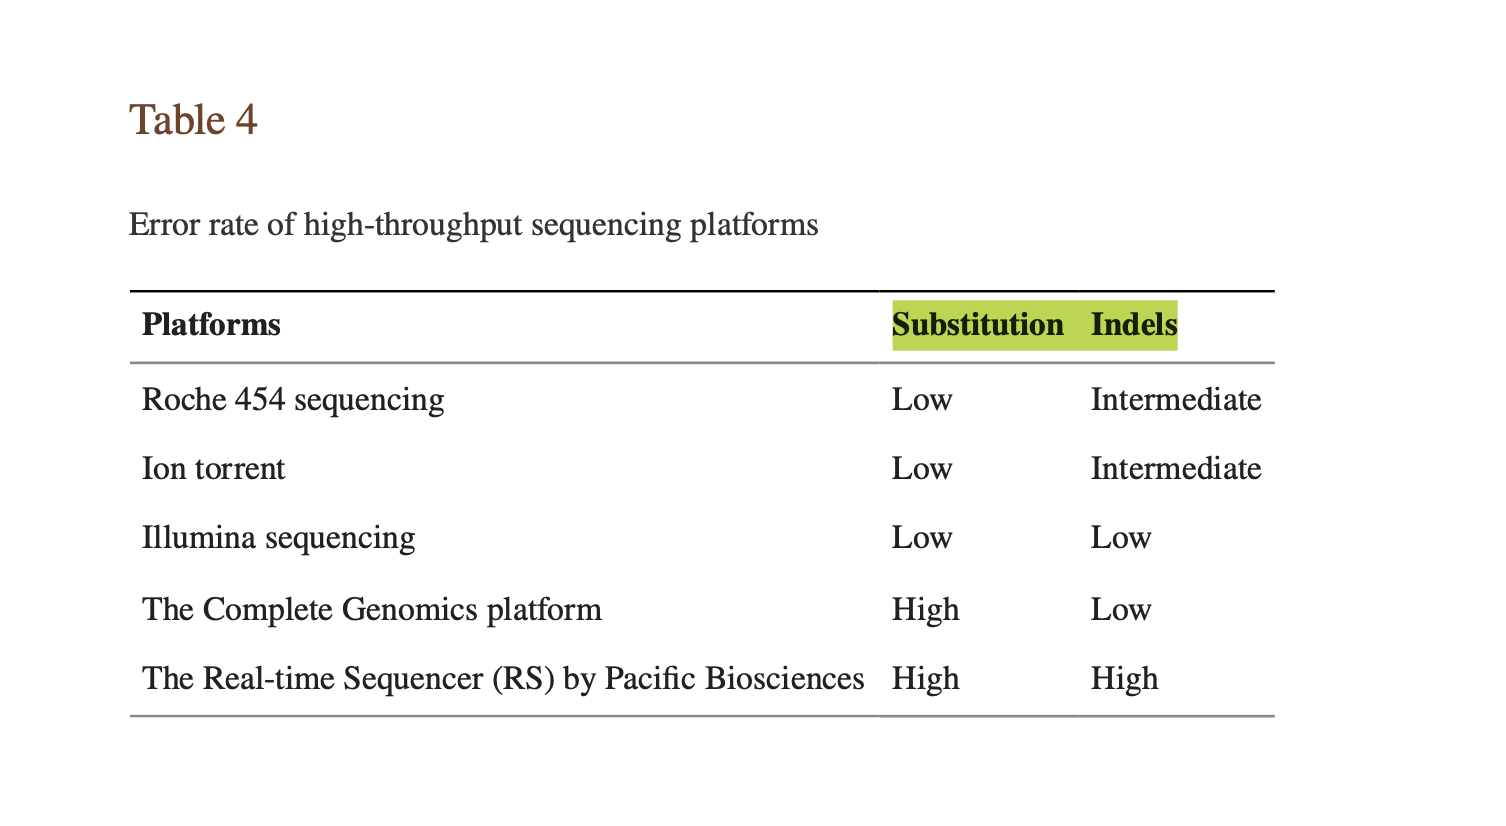

In [ ]:
# in this I hav enot used the chunking strategu and the length of chunks is
# much larger a sseen in the below cell

from unstructured.partition.pdf import partition_pdf


output_path = "./content/"

file_path = output_path + 'DNA_sequencing_breast_cancer.pdf'

# Reference: https://docs.unstructured.io/open-source/core-functionality/chunking
chunks2 = partition_pdf(
    filename=file_path,
    infer_table_structure=True,            # extract tables
    strategy="hi_res",     # it ensures the data is exttracted in high resolution             
    # mandatory to infer tables

    extract_image_block_types=["Image"],   # Add 'Table' to list to extract image of tables
    # image_output_dir_path=output_path,   # if None, images and tables will saved in base64

    extract_image_block_to_payload=True,   # if true, will extract base64 for API usage

    # chunking_strategy="by_title",          # or 'basic'
    # max_characters=10000,                  # defaults to 500
    # combine_text_under_n_chars=2000,       # defaults to 0
    # new_after_n_chars=6000,

    # extract_images_in_pdf=True,          # deprecated
)

In [7]:
len(chunks2)

410

In [ ]:
# for i in range(len(chunks2)):
#     print(f"length of chunks [{i}] = ",len(chunks2[i].text))

In [18]:
# partitioning the PDF into several chunks based on the title in the dicuments so
# that the meaning is not lost

from unstructured.partition.pdf import partition_pdf


output_path = "./content/"

file_path = output_path + 'DNA_sequencing_breast_cancer.pdf'

# Reference: https://docs.unstructured.io/open-source/core-functionality/chunking
chunks3 = partition_pdf(
    filename=file_path,
    infer_table_structure=True,            # extract tables
    strategy="hi_res",     # it ensures the data is exttracted in high resolution             
    # mandatory to infer tables

    extract_image_block_types=["Image","Table"],   # Add 'Table' to list to extract image of tables
    # image_output_dir_path=output_path,   # if None, images and tables will saved in base64

    extract_image_block_to_payload=True,   # if true, will extract base64 for API usage

    chunking_strategy="by_title",          # or 'basic'
    max_characters=10000,                  # defaults to 500
    combine_text_under_n_chars=2000,       # defaults to 0
    new_after_n_chars=6000,

    # extract_images_in_pdf=True,          # deprecated
)

In [20]:
chunks3

In [21]:
len(chunks3)

28

In [33]:
for i in range(len(chunks3)):
    print(f"length of chunks [{i}] = ",len(chunks3[i].text))

length of chunks [0] =  2088
length of chunks [1] =  3793
length of chunks [2] =  3761
length of chunks [3] =  2219
length of chunks [4] =  4963
length of chunks [5] =  262
length of chunks [6] =  1238
length of chunks [7] =  68
length of chunks [8] =  468
length of chunks [9] =  3674
length of chunks [10] =  968
length of chunks [11] =  1558
length of chunks [12] =  1504
length of chunks [13] =  199
length of chunks [14] =  5190
length of chunks [15] =  4045
length of chunks [16] =  3339
length of chunks [17] =  2586
length of chunks [18] =  4330
length of chunks [19] =  5145
length of chunks [20] =  3047
length of chunks [21] =  2541
length of chunks [22] =  2287
length of chunks [23] =  4139
length of chunks [24] =  2018
length of chunks [25] =  2024
length of chunks [26] =  3977
length of chunks [27] =  1651


In [12]:
chunks[0].to_dict()

{'type': 'CompositeElement',
 'element_id': 'ae1c18427680d8ad9eee7aba3c725c96',
 'text': '27/09/2024, 22:58\n\nCurrent Progresses of Single Cell DNA Sequencing in Breast Cancer Research - PMC\n\nAs a library, NLM provides access to scientiﬁc literature. Inclusion in an NLM database does not imply endorsement of, or agreement with, the contents by NLM or the National Institutes of Health.\n\nLearn more: PMC Disclaimer | PMC Copyright Notice\n\ngals INTERNATIONAL JOURNAL OF Gye! BLOLOGICAL SCIENCES Home | Editorial board | Author info | Submit a manuscript\n\nInt J Biol Sci. 2017; 13(8): 949–960.\n\nPMCID: PMC5599901\n\nPublished online 2017 Jul 18. doi: 10.7150/ijbs.19627\n\nPMID: 28924377\n\nCurrent Progresses of Single Cell DNA Sequencing in Breast Cancer Research\n\nJianlin Liu, Ragini Adhav, and Xiaoling Xu\n\nAbstract\n\nBreast cancers display striking genetic and phenotypic diversities. To date, several hypotheses are raised to explain and understand the heterogeneity, including t

In [13]:
chunks[0].metadata.orig_elements # it also has an image

### Using the "chunks" for the rest of the code

In [14]:
set([str(type(el)) for el in chunks])

{"<class 'unstructured.documents.elements.CompositeElement'>",
 "<class 'unstructured.documents.elements.Table'>"}

In [5]:
elements = chunks[3].metadata.orig_elements
elements

In [16]:
str(type(elements[0]))

"<class 'unstructured.documents.elements.Title'>"

In [6]:
chunk_images=[el for el in elements if "Image" in str(type(el))]
chunk_images

In [18]:
chunk_images[0].to_dict()

{'type': 'Image',
 'element_id': '4d7d0926-1fe9-4faf-a173-ad55db4eb2bc',
 'text': 'Clonal Genetic Selection expansion alterations pressure | —> [ ) Cancer cell oO { fa) Driver mutations [ ) Passenger mutation',
 'metadata': {'coordinates': {'points': ((381.25, 137.5),
    (381.25, 416.66666666666663),
    (1204.1666666666665, 416.66666666666663),
    (1204.1666666666665, 137.5)),
   'system': 'PixelSpace',
   'layout_width': 1653,
   'layout_height': 2339},
  'last_modified': '2024-11-29T13:25:54',
  'filetype': 'PPM',
  'languages': ['eng'],
  'page_number': 5,
  'image_base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAEXAzcDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZn

In [7]:
tables=[]
texts=[]

def extract_table_text(chunks):
    for ele in chunks:
        if "CompositeElement" in str(type(ele)):
            texts.append(ele)
            
        elif "Table" in str(type(ele)):
            tables.append(ele)
    

In [8]:
extract_table_text(chunks)

In [9]:
tables

In [10]:
texts

In [11]:
images=[]

def get_image_base64(chunks):
    for ele in chunks:
        if "CompositeElement" in str(type(ele)):
            chunk_ele = ele.metadata.orig_elements
            for img in chunk_ele:
                if "Image" in str(type(img)):
                    images.append(img.metadata.image_base64)
    
    
    

In [12]:
get_image_base64(chunks)
images

['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCACcBBIDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAqvdXcVnH5kzBV9TVis3XER9Jn3qDhe9OKTaTFLRDbbX7C7uPIhmV39Aa09wrzDwHJE1zdysil1ZgD9DX

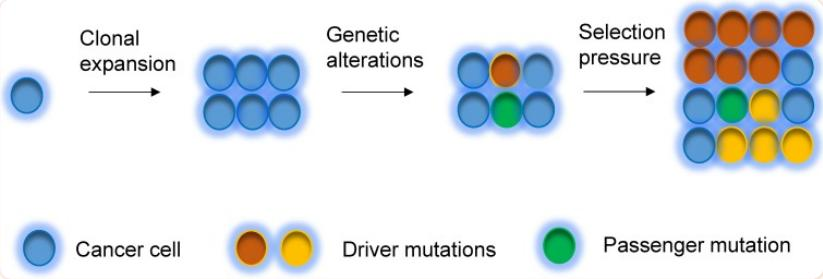

In [13]:
import base64
from IPython.display import Image, display

def display_base64(img):
    
    image = base64.b64decode(img)
    
    display(Image(data=image))

display_base64(images[3])

## Summarize the data

In [14]:
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

In [15]:
# Prompt
prompt_text = """
You are an assistant tasked with summarizing tables and text.
Give a concise summary of the table or text.

Respond only with the summary, no additionnal comment.
Do not start your message by saying "Here is a summary" or anything like that.
Just give the summary as it is.

Table or text chunk: {element}

"""
prompt = ChatPromptTemplate.from_template(prompt_text)

# Summary chain
model = ChatGroq(temperature=0.5, model="llama-3.1-8b-instant")
summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

In [16]:
print(texts[0])

27/09/2024, 22:58

Current Progresses of Single Cell DNA Sequencing in Breast Cancer Research - PMC

As a library, NLM provides access to scientiﬁc literature. Inclusion in an NLM database does not imply endorsement of, or agreement with, the contents by NLM or the National Institutes of Health.

Learn more: PMC Disclaimer | PMC Copyright Notice

gals INTERNATIONAL JOURNAL OF Gye! BLOLOGICAL SCIENCES Home | Editorial board | Author info | Submit a manuscript

Int J Biol Sci. 2017; 13(8): 949–960.

PMCID: PMC5599901

Published online 2017 Jul 18. doi: 10.7150/ijbs.19627

PMID: 28924377

Current Progresses of Single Cell DNA Sequencing in Breast Cancer Research

Jianlin Liu, Ragini Adhav, and Xiaoling Xu

Abstract

Breast cancers display striking genetic and phenotypic diversities. To date, several hypotheses are raised to explain and understand the heterogeneity, including theories for cancer stem cell (CSC) and clonal evolution. According to the CSC theory, the most tumorigenic cells, 

In [17]:
text_summaries = summarize_chain.batch(texts,{"max_concurrency":3})

tables_html = [table.metadata.text_as_html for table in tables]

table_summaries = summarize_chain.batch(tables_html,{"max_concurrency":3})

In [18]:
len(texts)

22

In [19]:
len(text_summaries)

22

In [20]:
text_summaries

['The article discusses the current progress of single cell DNA sequencing in breast cancer research, highlighting its potential to understand the heterogeneity in breast cancers and lay the foundations for new therapies.',
 'Breast cancer is a heterogeneous malignancy with high mortality rates due to drug resistance, recurrence, and metastasis. The cancer stem cell hypothesis suggests that CSCs contribute to disease recurrence and metastasis, and clonal evolution theory attributes tumor heterogeneity to heritable genetic and epigenetic changes. Emerging technologies, such as single cell sequencing, have advanced our understanding of heterogeneity in breast cancer, revealing intertumor and intratumor heterogeneity.',
 'Intratumor heterogeneity refers to the diversity of cancer cells within a single tumor, driven by cellular genetic alterations and potentially explained by two main theories: the cancer stem cell theory and the clonal evolution model. The cancer stem cell theory proposes

## table[0] from page 7
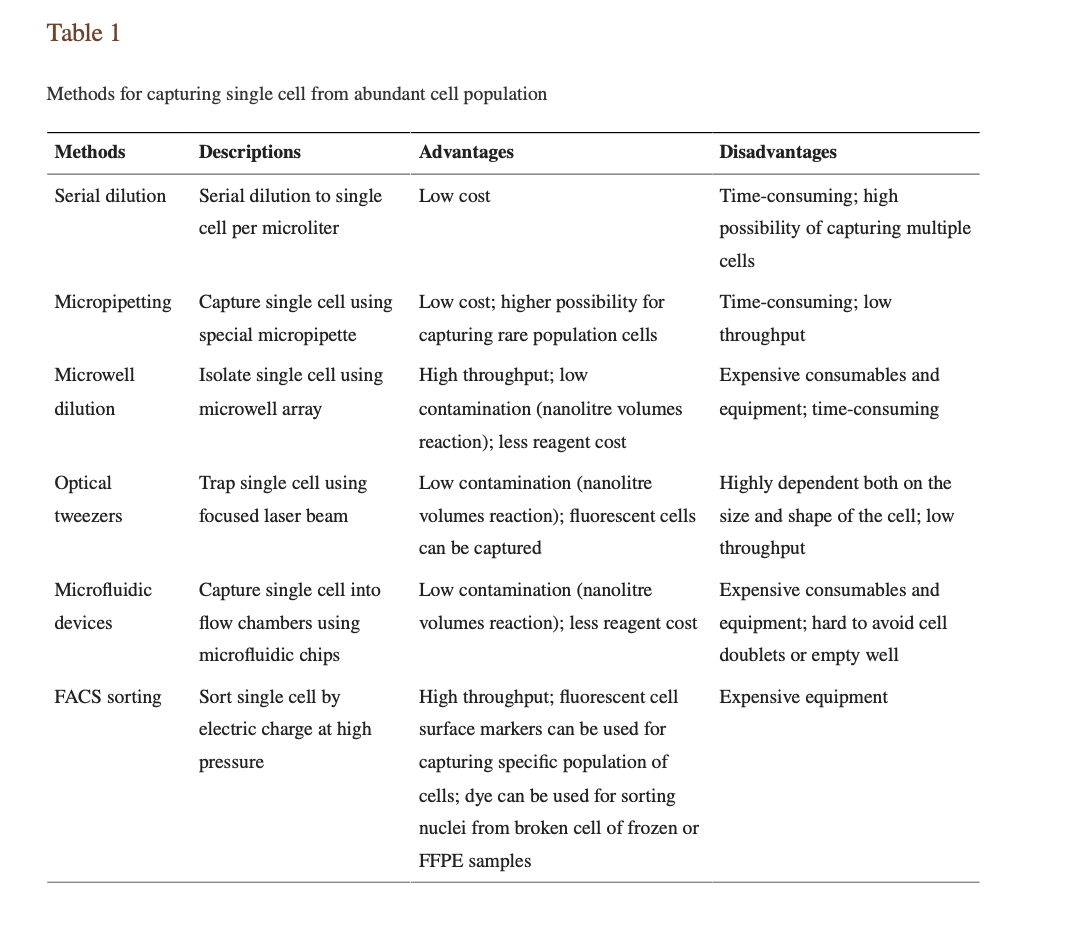

In [43]:
tables[0].metadata.to_dict()

{'last_modified': '2024-11-29T13:25:54',
 'text_as_html': '<table><tr><td>Methods</td><td>Descriptions</td><td>Advantages</td><td>Disadvantages</td></tr><tr><td>Serial dilution</td><td>Serial dilution to single</td><td>Low cost</td><td>Time-consuming; high</td></tr><tr><td>cell per microliter</td><td/><td>possibility of capturing multiple</td></tr><tr><td/><td/><td>cells</td></tr><tr><td>Micropipetting</td><td>Capture single cell using</td><td>Low cost; higher possibility for</td><td>Time-consuming; low</td></tr><tr><td>special micropipette</td><td>capturing rare population cells</td><td>throughput</td></tr><tr><td>Microwell</td><td>Isolate single cell using</td><td>High throughput; low</td><td>Expensive consumables and</td></tr><tr><td>dilution</td><td>microwell array</td><td>contamination (nanolitre volumes</td><td>equipment; time-consuming</td></tr><tr><td/><td/><td>reaction); less reagent cost</td><td/></tr><tr><td>Optical</td><td>Trap single cell using</td><td>Low contamination (n

In [44]:
tables[0].metadata.text_as_html

'<table><tr><td>Methods</td><td>Descriptions</td><td>Advantages</td><td>Disadvantages</td></tr><tr><td>Serial dilution</td><td>Serial dilution to single</td><td>Low cost</td><td>Time-consuming; high</td></tr><tr><td>cell per microliter</td><td/><td>possibility of capturing multiple</td></tr><tr><td/><td/><td>cells</td></tr><tr><td>Micropipetting</td><td>Capture single cell using</td><td>Low cost; higher possibility for</td><td>Time-consuming; low</td></tr><tr><td>special micropipette</td><td>capturing rare population cells</td><td>throughput</td></tr><tr><td>Microwell</td><td>Isolate single cell using</td><td>High throughput; low</td><td>Expensive consumables and</td></tr><tr><td>dilution</td><td>microwell array</td><td>contamination (nanolitre volumes</td><td>equipment; time-consuming</td></tr><tr><td/><td/><td>reaction); less reagent cost</td><td/></tr><tr><td>Optical</td><td>Trap single cell using</td><td>Low contamination (nanolitre</td><td>Highly dependent both on the</td></tr><tr

In [41]:
table_summaries

['The table compares five methods for isolating single cells: Serial dilution, Micropipetting, Microwell, Optical tweezers, and Microfluidic devices, and FACS sorting. Key advantages and disadvantages are: Serial dilution is low cost but time-consuming; Micropipetting is low cost but has low throughput; Microwell has high throughput but is expensive; Optical tweezers have low contamination but low throughput; Microfluidic devices have low contamination but are expensive; FACS sorting has high throughput but is expensive.',
 "The table compares four methods for isolating circulating tumor cells (CTCs): laser capture, microdissection, CTC-chip, and CellSearch. Each method's advantages and disadvantages are listed, including high-throughput capabilities, expensive equipment, and potential damage to DNA materials.",
 'Methods for whole-genome amplification (WGA) include primed PCR (DOP-PCR), multiple displacement amplification (MDA), multiple annealing and looping-based amplification cycle

In [23]:
from langchain_openai import ChatOpenAI

prompt_template = """ 
    Describe the image in detail. The images are from a research paper
    on the topic of "DNA sequencing breast cancer". So be specific about the data in 
    images. 
    """
    
    
messages = [
    (
        "user",
        [
            {"type":"text","text":prompt_template},
            {
                "type":"image_url",
                "image_url":{"url":"data:image/jpeg;base64,{image}"},
            },
        ],
    )
]
    
prompt = ChatPromptTemplate.from_messages(messages=messages)

chain = prompt | ChatOpenAI(model="gpt-4o-mini") | StrOutputParser()


In [24]:
image_summaries = chain.batch(images)

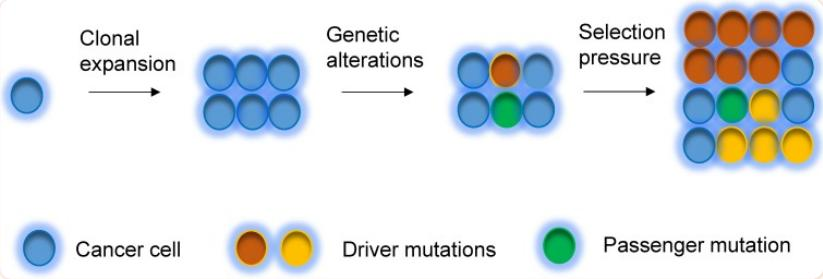

In [27]:
display_base64(images[3])

In [25]:
image_summaries

["I'm unable to view or describe specific images directly. However, if you can provide details about the images from the research paper on DNA sequencing in breast cancer, I can help you analyze or summarize that information. Please share the content or data represented in the images!",
 "I'm unable to view or describe the image directly. However, if you provide details about the content, such as graphs, charts, or specific data points, I can help you interpret or summarize that information related to DNA sequencing in breast cancer research.",
 'The image presents a diagram illustrating the cellular processes involved in breast cancer development, focusing on cancer stem cells (CSCs). \n\n1. **Oncogenic Transformation**: The diagram starts with a blue circle representing a normal stem cell. This cell undergoes oncogenic transformation, leading to the emergence of an orange cell, which symbolizes the cancer stem cell (CSC).\n\n2. **Self-Renewal**: The orange CSC can undergo self-renewa

In [29]:
print(image_summaries[2])

The image presents a diagram illustrating the cellular processes involved in breast cancer development, focusing on cancer stem cells (CSCs). 

1. **Oncogenic Transformation**: The diagram starts with a blue circle representing a normal stem cell. This cell undergoes oncogenic transformation, leading to the emergence of an orange cell, which symbolizes the cancer stem cell (CSC).

2. **Self-Renewal**: The orange CSC can undergo self-renewal, indicated by a circular arrow, suggesting it can replenish itself while maintaining its properties.

3. **Division Types**:
   - **Asymmetric Division**: This process allows the CSC to produce one CSC and another cell type, which is represented by a green circle, indicating non-cancer stem cells (non-CSC).
   - **Symmetric Division**: The CSC can also divide symmetrically, producing two identical CSCs.

4. **Expansion and Metastases**: 
   - From the symmetric division, the CSC can lead to expansion, shown as a cluster of orange and green cells, in

## Create the Vector Store

In [33]:
import uuid
from langchain.vectorstores import Chroma
from langchain.storage import InMemoryStore
from langchain_core.documents import Document
from langchain_openai.embeddings import OpenAIEmbeddings
from langchain.retrievers.multi_vector import MultiVectorRetriever

In [34]:
vectorstore = Chroma(collection_name="multimodal-rag",embedding_function=OpenAIEmbeddings())

/var/folders/r1/cy9_zcjj5g3f89_bxb54g6000000gn/T/ipykernel_1449/4075450551.py:1: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore = Chroma(collection_name="multimodal-rag",embedding_function=OpenAIEmbeddings())


In [36]:
store = InMemoryStore()
id_key = "doc_id"

In [40]:
retriever = MultiVectorRetriever(vectorstore=vectorstore,
                                 docstore=store,
                                 id_key=id_key)

print(retriever)

vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x31876d870> docstore=<langchain_core.stores.InMemoryStore object at 0x31a7d8790> search_kwargs={}


### Load the original data and link it to the summaries

In [47]:
doc_id = [str(uuid.uuid4()) for _ in texts]
summary_texts = [
    Document(page_content=summary, metadata={id_key:doc_id[i]}) for i, summary in enumerate(text_summaries)
] 

retriever.vectorstore.add_documents(summary_texts)
retriever.docstore.mset


In [48]:
summary_texts

[Document(metadata={'doc_id': '4e8ac399-67f5-4f1c-8fee-4fc38dcde60d'}, page_content='The article discusses the current progress of single cell DNA sequencing in breast cancer research, highlighting its potential to understand the heterogeneity in breast cancers and lay the foundations for new therapies.'),
 Document(metadata={'doc_id': '301ab06a-2c46-4b83-94d3-dd238d4d8284'}, page_content='Breast cancer is a heterogeneous malignancy with high mortality rates due to drug resistance, recurrence, and metastasis. The cancer stem cell hypothesis suggests that CSCs contribute to disease recurrence and metastasis, and clonal evolution theory attributes tumor heterogeneity to heritable genetic and epigenetic changes. Emerging technologies, such as single cell sequencing, have advanced our understanding of heterogeneity in breast cancer, revealing intertumor and intratumor heterogeneity.'),
 Document(metadata={'doc_id': '5a8c7d51-19a2-45fe-beea-9f29c801f43a'}, page_content='Intratumor heterogen